# Importação de bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Importando dados do ficheiro csv

In [2]:
!head data/ridehailing.csv

order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,dest_change_number,prediction_price_type,predicted_distance,predicted_duration,change_reason_pricing,ticket_id_new,device_token,rider_app_version,order_state,order_try_state,driver_app_version,driver_device_uid_new,device_name,eu_indicator,overpaid_ride_ticket,fraud_score
22,22,2020-02-02 3:37:31,4.04,10,2839,700,1,client,finished,1,upfront,13384,1091,,1376,,CI.4.17,finished,finished,DA.4.37,1596,Xiaomi Redmi 6,1,0,-1383
618,618,2020-02-08 2:26:19,6.09,3.6,5698,493,1,client,finished,1,upfront,2286,360,,2035,,CA.5.43,finished,finished,DA.4.39,1578,Samsung SM-G965F,1,0,
657,657,2020-02-08 11:50:35,4.32,3.5,4426,695,1,client,finished,1,upfront,4101,433,,2222,,CA.5.43,finished,finished,DA.4.37,951,Samsung SM-A530F,1,0,-166
313,313,2020-02-05 6:34:54,72871.72,,49748,1400,0,client,finished,2,upfront_destination_changed,3017,600,client_destination_changed,1788,,CA.5.23,fi

In [3]:
rides = pd.read_csv(
    'data/ridehailing.csv',
    parse_dates=['calc_created'])

# Obtendo detalhes gerais dos dados importados

In [4]:
rides.head()

order_id_new  order_try_id_new        calc_created  metered_price  \
0            22                22 2020-02-02 03:37:31           4.04   
1           618               618 2020-02-08 02:26:19           6.09   
2           657               657 2020-02-08 11:50:35           4.32   
3           313               313 2020-02-05 06:34:54       72871.72   
4          1176              1176 2020-02-13 17:31:24       20032.50   

   upfront_price  distance  duration  gps_confidence entered_by   b_state  \
0           10.0      2839       700               1     client  finished   
1            3.6      5698       493               1     client  finished   
2            3.5      4426       695               1     client  finished   
3            NaN     49748      1400               0     client  finished   
4        19500.0     10273      5067               1     client  finished   

   ...  device_token rider_app_version  order_state  order_try_state  \
0  ...           NaN           CI.4.17     finished         finished   
1  ...           NaN           CA.5.43     finished         finished   
2  ...           NaN           CA.5.43     finished         finished   
3  ...           NaN           CA.5.23     finished         finished   
4  ...           NaN           CA.5.04     finished         finished   

  driver_app_version  driver_device_uid_new       device_name eu_indicator  \
0            DA.4.37                   1596    Xiaomi Redmi 6            1   
1            DA.4.39                   1578  Samsung SM-G965F            1   
2            DA.4.37                    951  Samsung SM-A530F            1   
3            DA.4.37                   1587          TECNO-Y6            0   
4            DA.4.37                    433        Itel W5504            0   

  overpaid_ride_ticket fraud_score  
0                    0     -1383.0  
1                    0         NaN  
2                    0      -166.0  
3                    1         NaN  
4                    0         NaN  

[5 rows x 26 columns]

In [5]:
rides.shape

(4943, 26)

In [6]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4943 entries, 0 to 4942
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   order_id_new           4943 non-null   int64         
 1   order_try_id_new       4943 non-null   int64         
 2   calc_created           4943 non-null   datetime64[ns]
 3   metered_price          4923 non-null   float64       
 4   upfront_price          3409 non-null   float64       
 5   distance               4943 non-null   int64         
 6   duration               4943 non-null   int64         
 7   gps_confidence         4943 non-null   int64         
 8   entered_by             4943 non-null   object        
 9   b_state                4943 non-null   object        
 10  dest_change_number     4943 non-null   int64         
 11  prediction_price_type  4923 non-null   object        
 12  predicted_distance     4923 non-null   float64       
 13  pre

In [7]:
rides.describe()

order_id_new  order_try_id_new  metered_price  upfront_price  \
count   4943.000000       4943.000000    4923.000000    3409.000000   
mean    2061.074449       2061.074044    7998.471296    4160.095747   
std     1199.298429       1199.299081   15815.850352   17015.711912   
min        0.000000          0.000000       2.000000       2.000000   
25%     1020.500000       1020.500000       5.380000       4.200000   
50%     2065.000000       2065.000000      13.350000       6.600000   
75%     3090.500000       3090.500000   10991.670000    4000.000000   
max     4165.000000       4165.000000  194483.520000  595000.000000   

            distance      duration  gps_confidence  dest_change_number  \
count    4943.000000   4943.000000     4943.000000         4943.000000   
mean     9769.223144   1566.230629        0.800728            1.119361   
std     10912.426401   1650.329858        0.399493            0.499611   
min         0.000000      0.000000        0.000000            1.000000   
25%      3785.500000    604.000000        1.000000            1.000000   
50%      7140.000000   1054.000000        1.000000            1.000000   
75%     11953.000000   1929.500000        1.000000            1.000000   
max    233190.000000  22402.000000        1.000000           12.000000   

       predicted_distance  predicted_duration  ticket_id_new  device_token  \
count         4923.000000         4923.000000    4943.000000           0.0   
mean          8822.636807         1106.737355    2471.000000           NaN   
std          10548.801733          806.098535    1427.065521           NaN   
min              0.000000            0.000000       0.000000           NaN   
25%           4130.500000          597.500000    1235.500000           NaN   
50%           6918.000000          939.000000    2471.000000           NaN   
75%          10674.000000         1427.000000    3706.500000           NaN   
max         353538.000000        20992.000000    4942.000000           NaN   

       driver_device_uid_new  eu_indicator  overpaid_ride_ticket   fraud_score  
count            4943.000000   4943.000000           4943.000000   2184.000000  
mean             1093.311349      0.560388              0.068177   -674.046703  
std               626.408069      0.496390              0.252075   1119.189890  
min                 0.000000      0.000000              0.000000 -14225.000000  
25%               561.500000      0.000000              0.000000   -826.500000  
50%              1088.000000      1.000000              0.000000   -278.500000  
75%              1643.000000      1.000000              0.000000    -64.750000  
max              2158.000000      1.000000              1.000000     49.000000

# Analisando valores para alguns campos

fraud score of a rider. The higher it is the more likely the rider will cheat

In [8]:
rides['fraud_score'].describe()

count     2184.000000
mean      -674.046703
std       1119.189890
min     -14225.000000
25%       -826.500000
50%       -278.500000
75%        -64.750000
max         49.000000
Name: fraud_score, dtype: float64

<AxesSubplot:>

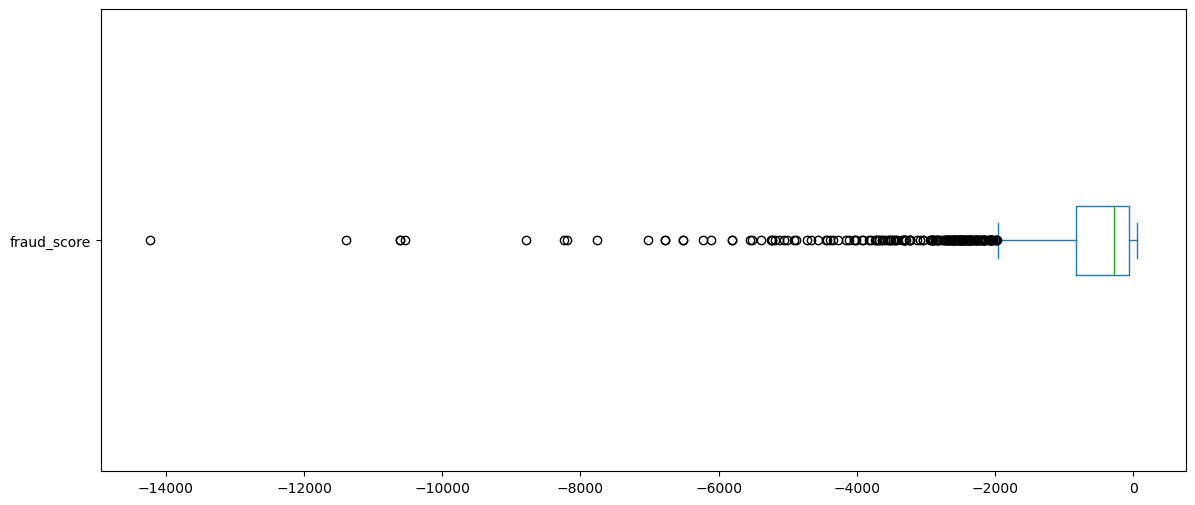

In [9]:
rides['fraud_score'].plot(kind='box', vert=False, figsize=(14,6))

In [10]:
rides['overpaid_ride_ticket'].describe()

count    4943.000000
mean        0.068177
std         0.252075
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: overpaid_ride_ticket, dtype: float64

In [11]:
rides['overpaid_ride_ticket'].value_counts()

0    4606
1     337
Name: overpaid_ride_ticket, dtype: int64

<AxesSubplot:>

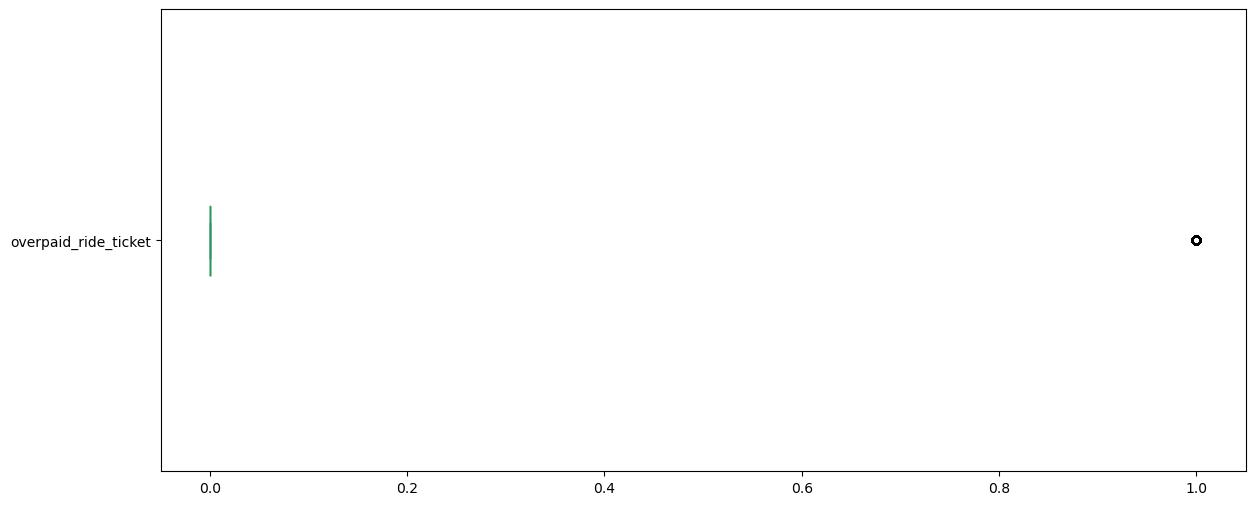

In [12]:
rides['overpaid_ride_ticket'].plot(kind='box', vert=False, figsize=(14,6))

who entered the address

In [13]:
rides['entered_by'].value_counts()

client      4722
driver       216
reseller       5
Name: entered_by, dtype: int64

In [14]:
rides['calc_created'].max()

Timestamp('2020-03-13 23:52:07')

In [15]:
rides['calc_created'].min()

Timestamp('2020-02-02 00:01:16')

In [16]:
rides['calc_created'].max() - rides['calc_created'].min()

Timedelta('40 days 23:50:51')

In [17]:
overpaid= rides.loc[(rides['overpaid_ride_ticket']==1)]
overpaid.head()

order_id_new  order_try_id_new        calc_created  metered_price  \
3            313               313 2020-02-05 06:34:54       72871.72   
20           201               201 2020-02-03 21:46:30       18929.92   
23          1477              1477 2020-02-15 19:41:47        6000.00   
24          1825              1825 2020-02-19 19:05:31       12329.22   
51          1867              1867 2020-02-20 07:26:49       55192.74   

    upfront_price  distance  duration  gps_confidence entered_by   b_state  \
3             NaN     49748      1400               0     client  finished   
20         6500.0     14560      1421               0     client  finished   
23        10000.0      2478       372               1     client  finished   
24            NaN      8063      1950               1     client  finished   
51            NaN     38311      1819               0     client  finished   

    ...  device_token rider_app_version  order_state  order_try_state  \
3   ...           NaN           CA.5.23     finished         finished   
20  ...           NaN           CA.4.99     finished         finished   
23  ...           NaN           CA.5.44     finished         finished   
24  ...           NaN           CI.4.17     finished         finished   
51  ...           NaN           CA.5.44     finished         finished   

   driver_app_version  driver_device_uid_new                     device_name  \
3             DA.4.37                   1587                        TECNO-Y6   
20            DA.4.10                     17  TECNO MOBILE LIMITED TECNO B1p   
23            DA.4.37                    267                      TECNO CA6S   
24            DA.4.34                    587                Samsung SM-T815Y   
51            DA.4.14                    335              HMD Global Nokia 1   

   eu_indicator overpaid_ride_ticket fraud_score  
3             0                    1         NaN  
20            0                    1         NaN  
23            0                    1         NaN  
24            0                    1         NaN  
51            0                    1         NaN  

[5 rows x 26 columns]

In [18]:
overpaid['calc_created'].max() - overpaid['calc_created'].min()

Timedelta('40 days 05:43:51')

In [19]:
overpaid['entered_by'].value_counts()

client    336
driver      1
Name: entered_by, dtype: int64

<AxesSubplot:xlabel='calc_created'>

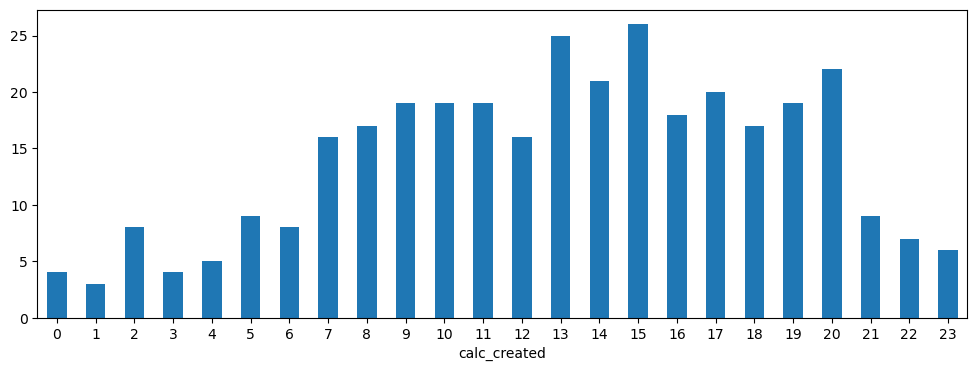

In [20]:
fig, axs = plt.subplots(figsize=(12, 4))
overpaid.groupby(overpaid["calc_created"].dt.hour)["overpaid_ride_ticket"].count().plot(
    kind='bar', rot=0, ax=axs
)

<AxesSubplot:xlabel='calc_created'>

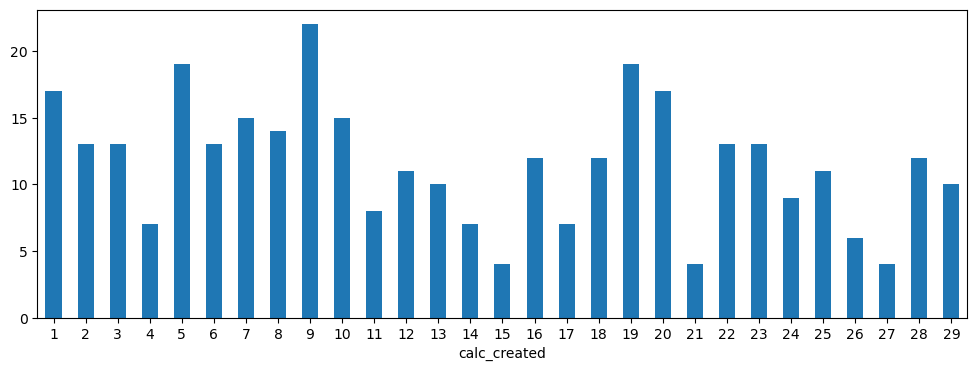

In [21]:
fig, axs = plt.subplots(figsize=(12, 4))
overpaid.groupby(overpaid["calc_created"].dt.day)["overpaid_ride_ticket"].count().plot(
    kind='bar', rot=0, ax=axs
)

state of a ride (finished implies that the ride was actually done)

In [22]:
rides['b_state'].value_counts()

finished    4943
Name: b_state, dtype: int64

number of destination changes by a rider and a driver. It includes the original input of the destination by a rider. That is why the minimum value of it is 1

In [23]:
rides['dest_change_number'].value_counts()

1     4555
2      260
3       89
4       21
5       12
6        2
7        2
9        1
12       1
Name: dest_change_number, dtype: int64

upfront, prediction - prediction happened before the ride | upfront_destination_changed - prediction happened after rider changed destination during the ride

In [24]:
rides['prediction_price_type'].value_counts()

upfront                        3432
prediction                     1279
upfront_destination_changed     208
upfront_waypoint_changed          4
Name: prediction_price_type, dtype: int64

records due to whose action the price changed

In [25]:
rides['change_reason_pricing'].value_counts()

driver_destination_changed    150
client_destination_changed    142
driver_waypoint_changed         6
Name: change_reason_pricing, dtype: int64

In [26]:
overpaid['change_reason_pricing'].value_counts()

client_destination_changed    12
Name: change_reason_pricing, dtype: int64

app version of rider phone

In [27]:
rides['rider_app_version'].value_counts()

CI.4.17    723
CI.4.19    624
CA.5.44    560
CA.5.43    406
CA.5.42    365
          ... 
CA.4.44      1
CI.3.81      1
CI.3.44      1
CI.3.62      1
CI.3.93      1
Name: rider_app_version, Length: 114, dtype: int64

app version of driver phone

In [28]:
rides['driver_app_version'].value_counts()

DA.4.39    1573
DA.4.37    1003
DA.4.42     807
DA.4.34     288
DA.4.31     282
DA.4.41     233
DI.3.34     112
DI.3.33     107
DI.3.36     104
DA.4.35      75
DA.4.16      63
DA.4.30      40
DI.3.39      33
DA.4.10      31
DA.4.19      30
DA.4.14      29
DA.4.23      24
DI.3.37      18
DI.3.32      17
DA.4.12      17
DI.3.31      13
DA.4.29       7
DA.4.22       5
DA.4.33       5
DI.3.38       5
DI.3.28       4
DA.4.38       4
DI.3.21       4
DI.3.26       4
DI.3.35       3
DI.3.29       1
DI.3.30       1
DA.4.32       1
Name: driver_app_version, dtype: int64

In [29]:
rides['order_state'].value_counts()

finished    4942
active         1
Name: order_state, dtype: int64

In [30]:
rides['order_try_state'].value_counts()

finished    4943
Name: order_try_state, dtype: int64

In [ ]:
the name of the phone

In [31]:
rides['device_name'].value_counts()

TECNO MOBILE LIMITED TECNO B1p    108
HMD Global Nokia 2.2               98
iPhone8,1                          91
TECNO F3                           86
HUAWEI MAR-LX1A                    73
                                 ... 
Samsung SM-N920V                    1
Samsung SM-G925T                    1
Samsung SM-G925A                    1
Xiaomi Redmi Note 5A Prime          1
Xiaomi Redmi Note 5A                1
Name: device_name, Length: 497, dtype: int64

whether a ride happens in EU

In [32]:
rides['eu_indicator'].value_counts()

1    2770
0    2173
Name: eu_indicator, dtype: int64

indicator for good GPS connection (1 - good one, 0 - bad one)

In [33]:
rides['gps_confidence'].value_counts()

1    3958
0     985
Name: gps_confidence, dtype: int64

indicator for a rider complaining about the overpaid ride

In [34]:
rides['overpaid_ride_ticket'].value_counts()

0    4606
1     337
Name: overpaid_ride_ticket, dtype: int64

# Analisando corelação entre as colunas

In [35]:
corr = rides.corr()

corr

order_id_new  order_try_id_new  metered_price  \
order_id_new               1.000000          1.000000      -0.075679   
order_try_id_new           1.000000          1.000000      -0.075679   
metered_price             -0.075679         -0.075679       1.000000   
upfront_price             -0.192324         -0.192323       0.420772   
distance                  -0.051329         -0.051329       0.539338   
duration                   0.019707          0.019707       0.536198   
gps_confidence            -0.000761         -0.000765      -0.403957   
dest_change_number        -0.004947         -0.004944      -0.036261   
predicted_distance        -0.044017         -0.044017       0.259371   
predicted_duration        -0.052429         -0.052429       0.448668   
ticket_id_new             -0.179416         -0.179415       0.037726   
device_token                    NaN               NaN            NaN   
driver_device_uid_new      0.007256          0.007258      -0.027712   
eu_indicator               0.064165          0.064162      -0.568434   
overpaid_ride_ticket       0.017189          0.017190       0.235677   
fraud_score                0.050084          0.050084      -0.014472   

                       upfront_price  distance  duration  gps_confidence  \
order_id_new               -0.192324 -0.051329  0.019707       -0.000761   
order_try_id_new           -0.192323 -0.051329  0.019707       -0.000765   
metered_price               0.420772  0.539338  0.536198       -0.403957   
upfront_price               1.000000  0.167040  0.238937       -0.206987   
distance                    0.167040  1.000000  0.522302       -0.211084   
duration                    0.238937  0.522302  1.000000       -0.329022   
gps_confidence             -0.206987 -0.211084 -0.329022        1.000000   
dest_change_number          0.051178  0.175893  0.156394       -0.048085   
predicted_distance          0.715542  0.598392  0.357255       -0.103470   
predicted_duration          0.746837  0.544905  0.523966       -0.246450   
ticket_id_new              -0.006228  0.037856  0.021176       -0.019144   
device_token                     NaN       NaN       NaN             NaN   
driver_device_uid_new      -0.026669 -0.070007 -0.008866        0.021836   
eu_indicator               -0.413250 -0.087481 -0.351428        0.433647   
overpaid_ride_ticket        0.123028  0.116946  0.099769       -0.268944   
fraud_score                -0.075351  0.069908  0.038757       -0.026592   

                       dest_change_number  predicted_distance  \
order_id_new                    -0.004947           -0.044017   
order_try_id_new                -0.004944           -0.044017   
metered_price                   -0.036261            0.259371   
upfront_price                    0.051178            0.715542   
distance                         0.175893            0.598392   
duration                         0.156394            0.357255   
gps_confidence                  -0.048085           -0.103470   
dest_change_number               1.000000            0.085040   
predicted_distance               0.085040            1.000000   
predicted_duration               0.044324            0.863098   
ticket_id_new                   -0.013163            0.031219   
device_token                          NaN                 NaN   
driver_device_uid_new           -0.016302           -0.045047   
eu_indicator                     0.104739           -0.093982   
overpaid_ride_ticket            -0.037315            0.024945   
fraud_score                      0.027714            0.064431   

                       predicted_duration  ticket_id_new  device_token  \
order_id_new                    -0.052429      -0.179416           NaN   
order_try_id_new                -0.052429      -0.179415           NaN   
metered_price                    0.448668       0.037726           NaN   
upfront_price                    0.746837      -0.006228           NaN   
distance                     

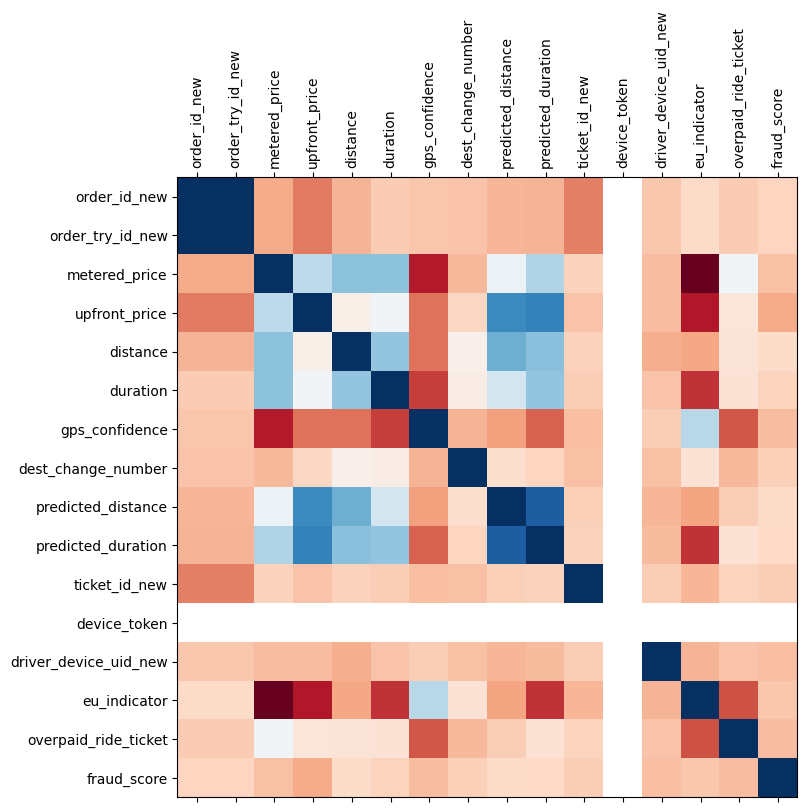

In [36]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

## Analisando campos com maior corelação em relação ao indicador de overpay

<AxesSubplot:xlabel='dest_change_number', ylabel='overpaid_ride_ticket'>

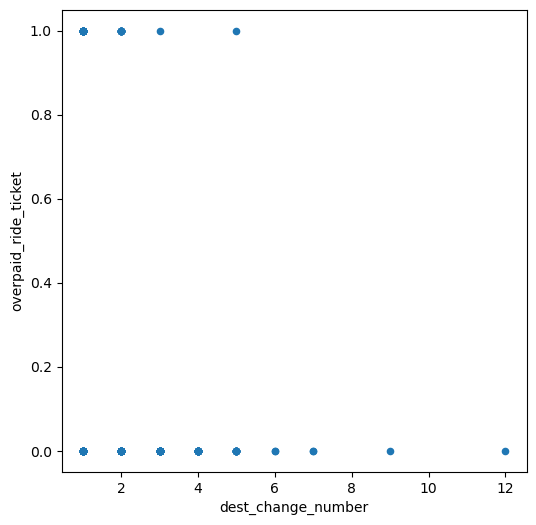

In [37]:
rides.plot(kind='scatter', x='dest_change_number', y='overpaid_ride_ticket', figsize=(6,6))

In [38]:
rides.loc[rides['overpaid_ride_ticket']==1].shape

(337, 26)

In [39]:
rides.loc[(rides['overpaid_ride_ticket']==1) & (rides['gps_confidence']==1)].shape

(136, 26)

Percentagem de viajantes que pagaram mais pela viagem e tinham indicador de má qualidade de gps

In [40]:
rides.loc[(rides['overpaid_ride_ticket']==1) & (rides['gps_confidence']==0)].shape[0]/rides.loc[rides['overpaid_ride_ticket']==1].shape[0]

0.5964391691394659

<AxesSubplot:xlabel='eu_indicator', ylabel='overpaid_ride_ticket'>

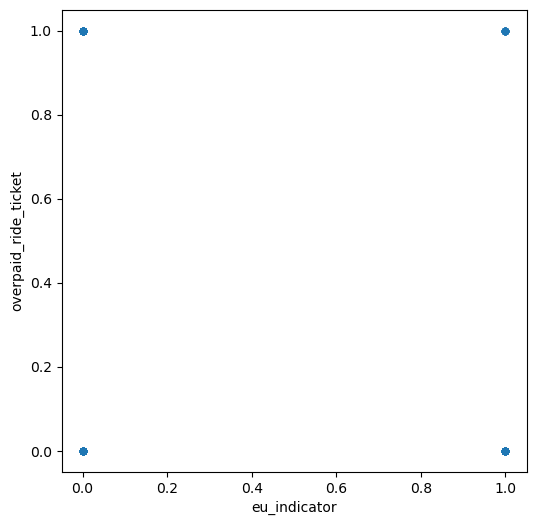

In [41]:
rides.plot(kind='scatter', x='eu_indicator', y='overpaid_ride_ticket', figsize=(6,6))

Percentagem de viajantes que pagaram mais pela viagem fora da eu

In [42]:
rides.loc[(rides['overpaid_ride_ticket']==1) & (rides['eu_indicator']==0)].shape[0]/rides.loc[rides['overpaid_ride_ticket']==1].shape[0]

0.9614243323442137

Text(0, 0.5, 'overpaid_ride_ticket')

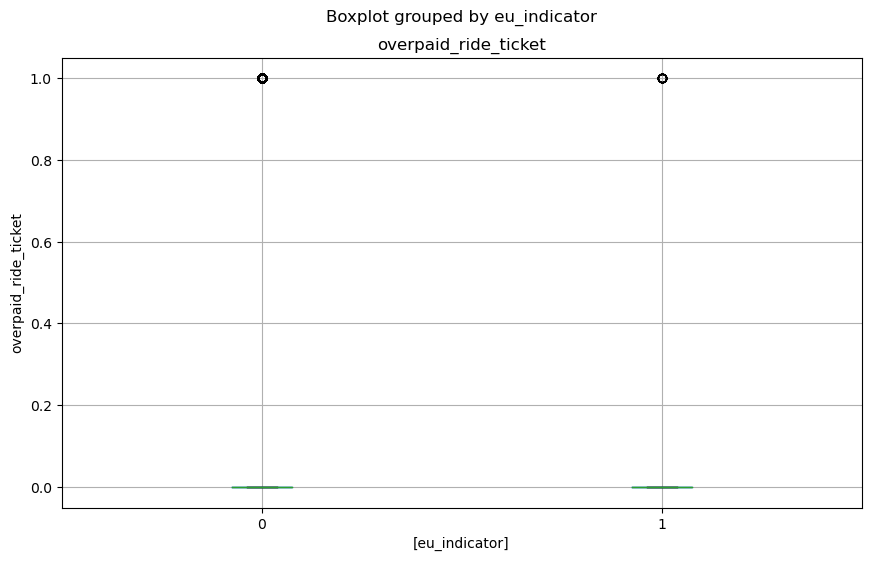

In [43]:
ax = rides[['overpaid_ride_ticket', 'eu_indicator']].boxplot(by='eu_indicator', figsize=(10,6))
ax.set_ylabel('overpaid_ride_ticket')

In [44]:
rides.loc[(rides['overpaid_ride_ticket']==1)]

order_id_new  order_try_id_new        calc_created  metered_price  \
3              313               313 2020-02-05 06:34:54       72871.72   
20             201               201 2020-02-03 21:46:30       18929.92   
23            1477              1477 2020-02-15 19:41:47        6000.00   
24            1825              1825 2020-02-19 19:05:31       12329.22   
51            1867              1867 2020-02-20 07:26:49       55192.74   
...            ...               ...                 ...            ...   
4866           125               125 2020-02-03 05:56:59        6245.38   
4873          1772              1772 2020-02-19 07:03:44       26187.54   
4891          2727              2727 2020-02-28 16:09:26       20638.74   
4907          1516              1516 2020-02-16 02:20:50        9407.28   
4928          3832              3832 2020-03-11 00:23:33      157006.04   

      upfront_price  distance  duration  gps_confidence entered_by   b_state  \
3               NaN     49748      1400               0     client  finished   
20           6500.0     14560      1421               0     client  finished   
23          10000.0      2478       372               1     client  finished   
24              NaN      8063      1950               1     client  finished   
51              NaN     38311      1819               0     client  finished   
...             ...       ...       ...             ...        ...       ...   
4866         6500.0      2633      1135               1     client  finished   
4873            NaN     18868      2725               0     client  finished   
4891            NaN     11410      4838               0     client  finished   
4907         9500.0      7133       813               1     client  finished   
4928            NaN     69657      2482               0     client  finished   

      ...  device_token rider_app_version  order_state  order_try_state  \
3     ...           NaN           CA.5.23     finished         finished   
20    ...           NaN           CA.4.99     finished         finished   
23    ...           NaN           CA.5.44     finished         finished   
24    ...           NaN           CI.4.17     finished         finished   
51    ...           NaN           CA.5.44     finished         finished   
...   ...           ...               ...          ...              ...   
4866  ...           NaN           CA.4.73     finished         finished   
4873  ...           NaN           CI.4.17     finished         finished   
4891  ...           NaN           CA.5.44     finished         finished   
4907  ...           NaN           CA.4.83     finished         finished   
4928  ...           NaN           CA.5.46     finished         finished   

     driver_app_version  driver_device_uid_new  \
3               DA.4.37                   1587   
20              DA.4.10                     17   
23              DA.4.37                    267   
24              DA.4.34                    587   
51              DA.4.14                    335   
...                 ...                    ...   
4866            DA.4.34                   1951   
4873            DA.4.37                    994   
4891            DA.4.37                   1019   
4907            DA.4.39                   1403   
4928            DA.4.16                   1134   

                         device_name eu_indicator overpaid_ride_ticket  \
3                           TECNO-Y6            0                    1   
20    TECNO MOBILE LIMITED TECNO B1p            0                    1   
23                        TECNO CA6S            0                    1   
24                  Samsung SM-T815Y            0                    1   
51                HMD Global Nokia 1            0                    1   
...                              ...          ...                  ...   
4866                    Lava LAVA_R1            0                    1   
4873                        TECNO-J8            0 

# Data manipulation

turn fraud score numbers into positive numbers

In [45]:
rides['fraud_score'] = abs (rides['fraud_score'])
rides['fraud_score'].head()

0    1383.0
1       NaN
2     166.0
3       NaN
4       NaN
Name: fraud_score, dtype: float64

In [46]:
rides.loc[(rides['overpaid_ride_ticket']==1) & (rides['eu_indicator']==0)].shape[0]/rides.loc[rides['overpaid_ride_ticket']==1].shape[0]

0.9614243323442137

In [47]:
rides.loc[rides['overpaid_ride_ticket']==1, 'entered_by'].value_counts()

client    336
driver      1
Name: entered_by, dtype: int64

<AxesSubplot:>

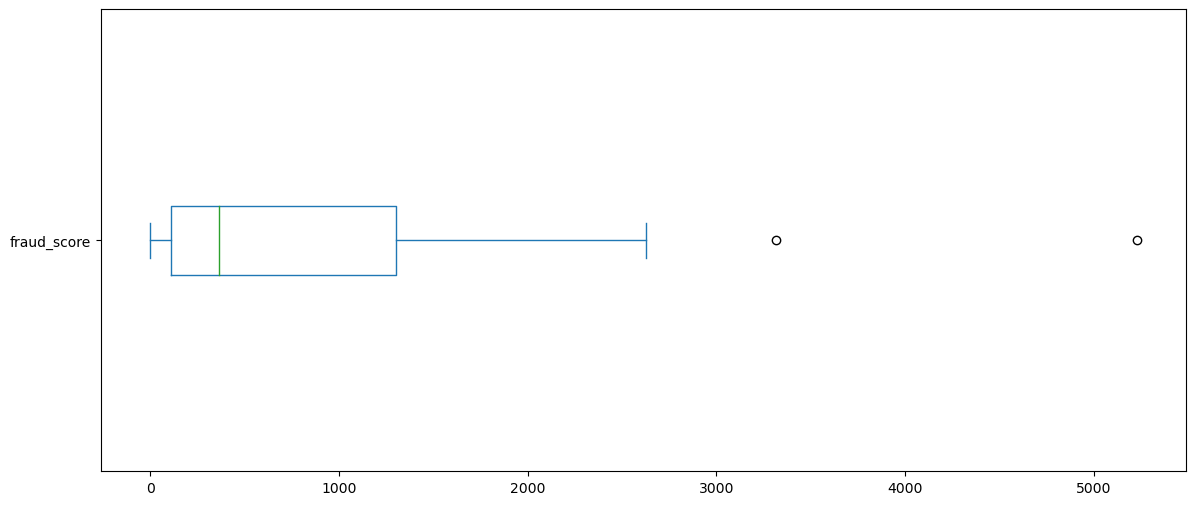

In [48]:
rides.loc[rides['overpaid_ride_ticket']==1,'fraud_score'].plot(kind='box', vert=False, figsize=(14,6))

In [49]:
rides.loc[rides['overpaid_ride_ticket']==1,'fraud_score'].describe()

count      17.000000
mean     1033.647059
std      1447.568174
min         0.000000
25%       108.000000
50%       364.000000
75%      1302.000000
max      5228.000000
Name: fraud_score, dtype: float64

In [50]:
rides.loc[(rides['overpaid_ride_ticket']==1) & (rides['fraud_score']> 0)].shape[0]

16

In [51]:
rides.loc[rides['overpaid_ride_ticket']==1, 'dest_change_number'].value_counts()

1    324
2     11
3      1
5      1
Name: dest_change_number, dtype: int64

In [52]:
rides.loc[rides['overpaid_ride_ticket']==1, 'prediction_price_type'].value_counts()

prediction                     222
upfront                        112
upfront_destination_changed      3
Name: prediction_price_type, dtype: int64

In [53]:
rides.loc[(rides['overpaid_ride_ticket']==1) & ( rides['change_reason_pricing']=='client_destination_changed')]

order_id_new  order_try_id_new        calc_created  metered_price  \
3              313               313 2020-02-05 06:34:54       72871.72   
198            148               148 2020-02-03 11:04:09       27435.60   
264           1568              1568 2020-02-16 19:02:26        6000.00   
271           2458              2458 2020-02-25 12:43:58       16178.04   
955           3968              3968 2020-03-12 10:07:21       54565.54   
1630          2638              2638 2020-02-27 17:19:48       14988.20   
2723          2638              2638 2020-02-27 17:19:48       14988.20   
2923          2161              2161 2020-02-22 13:12:27       12587.22   
3207          1531              1531 2020-02-16 07:44:01       15740.52   
3590          1214              1214 2020-02-14 05:32:31       50771.74   
3864          4108              4109 2020-03-13 14:58:08       22695.50   
3941          2470              2470 2020-02-25 15:07:11       21467.76   

      upfront_price  distance  duration  gps_confidence entered_by   b_state  \
3               NaN     49748      1400               0     client  finished   
198         74500.0     12124      3335               0     client  finished   
264        101500.0      3389       557               1     client  finished   
271             NaN      7003      4570               0     client  finished   
955             NaN     34275      4789               0     client  finished   
1630            NaN     21048      5056               0     client  finished   
2723            NaN     21048      5056               0     client  finished   
2923            NaN     10953       672               0     client  finished   
3207            NaN     11255      2240               0     client  finished   
3590            NaN     31361      5292               0     client  finished   
3864            NaN     16522      2871               1     client  finished   
3941            NaN      9071      6439               0     client  finished   

      ...  device_token rider_app_version  order_state  order_try_state  \
3     ...           NaN           CA.5.23     finished         finished   
198   ...           NaN           CI.4.17     finished         finished   
264   ...           NaN           CA.5.44     finished         finished   
271   ...           NaN           CA.5.44     finished         finished   
955   ...           NaN           CA.5.45     finished         finished   
1630  ...           NaN           CA.5.13     finished         finished   
2723  ...           NaN           CA.5.13     finished         finished   
2923  ...           NaN           CI.4.18     finished         finished   
3207  ...           NaN           CA.4.77     finished         finished   
3590  ...           NaN           CA.5.04     finished         finished   
3864  ...           NaN           CI.4.19     finished         finished   
3941  ...           NaN           CA.5.44     finished         finished   

     driver_app_version  driver_device_uid_new  \
3               DA.4.37                   1587   
198             DA.4.14                    168   
264             DA.4.34                    494   
271             DA.4.34                    848   
955             DA.4.42                   1798   
1630            DA.4.41                    265   
2723            DA.4.41                    265   
2923            DA.4.14                     47   
3207            DA.4.16                    542   
3590            DA.4.34                   1261   
3864            DA.4.42                    819   
3941            DA.4.34                    848   

                         device_name eu_indicator overpaid_ride_ticket  \
3                           TECNO-Y6            0                    1   
198   TECNO MOBILE LIMITED TECNO KC6            0                    1   
264   TECNO MOBILE LIMITED TECNO KB8            0                    1   
271                     TECNO CX Air            0                 

In [54]:
rides.loc[(rides['overpaid_ride_ticket']==1) & ( rides['upfront_price'] >0) ]

order_id_new  order_try_id_new        calc_created  metered_price  \
20             201               201 2020-02-03 21:46:30       18929.92   
23            1477              1477 2020-02-15 19:41:47        6000.00   
67             536               537 2020-02-07 15:12:43       11323.02   
103            225               225 2020-02-04 09:26:05        9788.40   
122           1058              1058 2020-02-12 08:56:25        6000.00   
...            ...               ...                 ...            ...   
4546           841               841 2020-02-09 23:58:25       31358.02   
4637          1434              1434 2020-02-15 10:53:32        6000.00   
4770           655               655 2020-02-08 12:32:37      130164.46   
4866           125               125 2020-02-03 05:56:59        6245.38   
4907          1516              1516 2020-02-16 02:20:50        9407.28   

      upfront_price  distance  duration  gps_confidence entered_by   b_state  \
20           6500.0     14560      1421               0     client  finished   
23          10000.0      2478       372               1     client  finished   
67           8500.0      8573      1168               0     client  finished   
103          5000.0     15396      2206               1     client  finished   
122          6000.0      2362       337               1     client  finished   
...             ...       ...       ...             ...        ...       ...   
4546        11000.0     21756      3023               0     client  finished   
4637         8000.0        61        46               1     client  finished   
4770        19500.0     53241      2171               0     client  finished   
4866         6500.0      2633      1135               1     client  finished   
4907         9500.0      7133       813               1     client  finished   

      ...  device_token rider_app_version  order_state  order_try_state  \
20    ...           NaN           CA.4.99     finished         finished   
23    ...           NaN           CA.5.44     finished         finished   
67    ...           NaN           CA.5.27     finished         finished   
103   ...           NaN           CA.5.42     finished         finished   
122   ...           NaN           CA.5.43     finished         finished   
...   ...           ...               ...          ...              ...   
4546  ...           NaN           CI.4.17     finished         finished   
4637  ...           NaN           CA.5.32     finished         finished   
4770  ...           NaN           CA.5.17     finished         finished   
4866  ...           NaN           CA.4.73     finished         finished   
4907  ...           NaN           CA.4.83     finished         finished   

     driver_app_version  driver_device_uid_new  \
20              DA.4.10                     17   
23              DA.4.37                    267   
67              DA.4.10                    253   
103             DA.4.37                   1862   
122             DA.4.39                   1576   
...                 ...                    ...   
4546            DA.4.39                    487   
4637            DA.4.31                   1078   
4770            DA.4.14                    335   
4866            DA.4.34                   1951   
4907            DA.4.39                   1403   

                         device_name eu_indicator overpaid_ride_ticket  \
20    TECNO MOBILE LIMITED TECNO B1p            0                    1   
23                        TECNO CA6S            0                    1   
67     TECNO MOBILE LIMITED TECNO B1            0                    1   
103                         TECNO F3            0                    1   
122   TECNO MOBILE LIMITED TECNO BA2            0                    1   
...                              ...          ...                  ...   
4546  TECNO MOBILE LIMITED TECNO B1p            0                    1   
4637                   Infinix X559C            0 

In [55]:
rides.loc[((rides['overpaid_ride_ticket']==1) & ( rides['upfront_price'] >0) & (rides['metered_price'] > rides['upfront_price'])) ]

order_id_new  order_try_id_new        calc_created  metered_price  \
20             201               201 2020-02-03 21:46:30       18929.92   
67             536               537 2020-02-07 15:12:43       11323.02   
103            225               225 2020-02-04 09:26:05        9788.40   
125           1333              1333 2020-02-14 21:33:14       20258.93   
282           4071              4071 2020-03-13 09:43:31          12.72   
...            ...               ...                 ...            ...   
4426           686               686 2020-02-08 17:10:58       54005.98   
4453          1025              1025 2020-02-12 00:26:21       12428.33   
4507          1294              1294 2020-02-14 19:24:47       33184.04   
4546           841               841 2020-02-09 23:58:25       31358.02   
4770           655               655 2020-02-08 12:32:37      130164.46   

      upfront_price  distance  duration  gps_confidence entered_by   b_state  \
20           6500.0     14560      1421               0     client  finished   
67           8500.0      8573      1168               0     client  finished   
103          5000.0     15396      2206               1     client  finished   
125         15500.0      8505      1195               1     client  finished   
282             6.3      9574      5093               1     client  finished   
...             ...       ...       ...             ...        ...       ...   
4426        26500.0     34837      3981               0     client  finished   
4453        10500.0      9892       805               0     client  finished   
4507        16000.0     16549      8566               1     client  finished   
4546        11000.0     21756      3023               0     client  finished   
4770        19500.0     53241      2171               0     client  finished   

      ...  device_token rider_app_version  order_state  order_try_state  \
20    ...           NaN           CA.4.99     finished         finished   
67    ...           NaN           CA.5.27     finished         finished   
103   ...           NaN           CA.5.42     finished         finished   
125   ...           NaN           CI.4.17     finished         finished   
282   ...           NaN           CI.4.19     finished         finished   
...   ...           ...               ...          ...              ...   
4426  ...           NaN           CA.5.42     finished         finished   
4453  ...           NaN           CI.4.18     finished         finished   
4507  ...           NaN           CA.5.44     finished         finished   
4546  ...           NaN           CI.4.17     finished         finished   
4770  ...           NaN           CA.5.17     finished         finished   

     driver_app_version  driver_device_uid_new  \
20              DA.4.10                     17   
67              DA.4.10                    253   
103             DA.4.37                   1862   
125             DA.4.34                   1907   
282             DA.4.42                   1046   
...                 ...                    ...   
4426            DA.4.19                   1831   
4453            DA.4.34                   1261   
4507            DA.4.31                   2052   
4546            DA.4.39                    487   
4770            DA.4.14                    335   

                          device_name eu_indicator overpaid_ride_ticket  \
20     TECNO MOBILE LIMITED TECNO B1p            0                    1   
67      TECNO MOBILE LIMITED TECNO B1            0                    1   
103                          TECNO F3            0                    1   
125   TECNO MOBILE LIMITED TECNO KA7O            0                    1   
282                    HUAWEI POT-LX1            1                    1   
...                               ...          ...                  ...   
4426                 Samsung SM-G935F            0                    1   
4453                         TECNO-L8     

Add fields for the diference in distance, price and duration

In [56]:
rides['price_diff'] = rides['metered_price'] - rides['upfront_price']

rides['price_diff'].describe()

count      3409.000000
mean        839.204362
std       17010.080750
min     -581317.540000
25%          -0.300000
50%           0.300000
75%           2.120000
max      178983.520000
Name: price_diff, dtype: float64

In [57]:
aux2 = rides.loc[rides['overpaid_ride_ticket']==1, 'metered_price'] - rides.loc[rides['overpaid_ride_ticket']==1, 'upfront_price']

In [58]:
aux2.describe()

count       108.000000
mean       7820.722222
std       27966.991367
min      -95500.000000
25%        -605.000000
50%         258.755000
75%        7118.937500
max      126723.200000
dtype: float64

In [59]:
rides.loc[rides['overpaid_ride_ticket']==1, 'rider_app_version'].value_counts()

CA.5.44    50
CI.4.17    30
CI.4.19    30
CA.5.42    24
CA.5.43    19
CA.5.36    18
CI.4.14    18
CI.4.18    17
CA.5.45    16
CA.5.40    12
CA.5.46     8
CA.5.04     6
CA.5.32     6
CA.5.13     5
CI.4.16     5
CA.5.38     5
CA.5.01     4
CA.5.23     3
CA.5.25     3
CI.4.11     3
CA.4.73     3
CA.5.47     3
CA.5.00     3
CA.5.27     3
CA.4.99     3
CA.5.08     2
CA.4.77     2
CA.5.30     2
CI.4.02     2
CI.4.22     2
CI.4.10     2
CA.5.26     2
CA.4.83     2
CI.4.23     2
CI.4.13     2
CA.5.37     2
CA.4.65     1
CI.4.09     1
CI.4.07     1
CA.4.42     1
CA.4.89     1
CI.4.05     1
CA.4.52     1
CA.5.35     1
CI.4.01     1
CA.4.87     1
CI.3.84     1
CA.5.02     1
CA.4.72     1
CA.5.16     1
CA.4.41     1
CA.5.19     1
CI.4.12     1
CA.5.17     1
Name: rider_app_version, dtype: int64

In [60]:
rides.loc[rides['overpaid_ride_ticket']==1, 'driver_app_version'].value_counts()

DA.4.39    92
DA.4.37    55
DA.4.42    53
DA.4.31    31
DA.4.34    24
DA.4.41    19
DA.4.14    11
DA.4.16    11
DA.4.10     8
DA.4.23     6
DA.4.35     6
DA.4.19     5
DI.3.34     4
DA.4.30     3
DI.3.36     3
DA.4.12     2
DI.3.28     1
DA.4.22     1
DA.4.33     1
DI.3.21     1
Name: driver_app_version, dtype: int64

create a field did_destination change that 

In [61]:
rides['destination_changed'] = rides['dest_change_number'] == 1

rides['destination_changed'].head()

0     True
1     True
2     True
3    False
4     True
Name: destination_changed, dtype: bool

In [62]:
rides.loc[rides['overpaid_ride_ticket']==1].shape

(337, 28)

In [63]:
rides['prediction_price_type'].head()

0                        upfront
1                        upfront
2                        upfront
3    upfront_destination_changed
4                        upfront
Name: prediction_price_type, dtype: object

In [64]:
rides['prediction_type']= np.where(rides['prediction_price_type'].str.contains('(?:changed|destination)',regex=True),'post-change','upfront')
rides['prediction_type'].head()

0        upfront
1        upfront
2        upfront
3    post-change
4        upfront
Name: prediction_type, dtype: object

In [65]:
rides['rider_app_version'].value_counts()

CI.4.17    723
CI.4.19    624
CA.5.44    560
CA.5.43    406
CA.5.42    365
          ... 
CA.4.44      1
CI.3.81      1
CI.3.44      1
CI.3.62      1
CI.3.93      1
Name: rider_app_version, Length: 114, dtype: int64

In [66]:
rides['rider_app'] = np.where(rides['rider_app_version'].str.startswith('CI.'), 'CI', 'CA')
rides['rider_app'].head()

0    CI
1    CA
2    CA
3    CA
4    CA
Name: rider_app, dtype: object

In [67]:
rides['rider_version'] = (rides['rider_app_version'].str.replace('C(?:I|A).', '',regex=True)).apply(pd.to_numeric)
rides['rider_version'].head()

0    4.17
1    5.43
2    5.43
3    5.23
4    5.04
Name: rider_version, dtype: float64

In [68]:
rides['driver_app_version'].value_counts()

DA.4.39    1573
DA.4.37    1003
DA.4.42     807
DA.4.34     288
DA.4.31     282
DA.4.41     233
DI.3.34     112
DI.3.33     107
DI.3.36     104
DA.4.35      75
DA.4.16      63
DA.4.30      40
DI.3.39      33
DA.4.10      31
DA.4.19      30
DA.4.14      29
DA.4.23      24
DI.3.37      18
DI.3.32      17
DA.4.12      17
DI.3.31      13
DA.4.29       7
DA.4.22       5
DA.4.33       5
DI.3.38       5
DI.3.28       4
DA.4.38       4
DI.3.21       4
DI.3.26       4
DI.3.35       3
DI.3.29       1
DI.3.30       1
DA.4.32       1
Name: driver_app_version, dtype: int64

In [69]:
rides['driver_app'] = np.where(rides['driver_app_version'].str.startswith('DI.'), 'DI', 'DA')
rides['driver_app'].head()

0    DA
1    DA
2    DA
3    DA
4    DA
Name: driver_app, dtype: object

In [70]:
rides['driver_version'] = (rides['driver_app_version'].str.replace('D(?:I|A).', '',regex=True)).apply(pd.to_numeric)
rides['driver_version'].head()

0    4.37
1    4.39
2    4.37
3    4.37
4    4.37
Name: driver_version, dtype: float64

In [71]:
rides.loc[rides['overpaid_ride_ticket']==1, 'driver_app'].value_counts()

DA    328
DI      9
Name: driver_app, dtype: int64

In [72]:
rides.loc[rides['overpaid_ride_ticket']==1, 'rider_app'].value_counts()

CA    218
CI    119
Name: rider_app, dtype: int64

<AxesSubplot:>

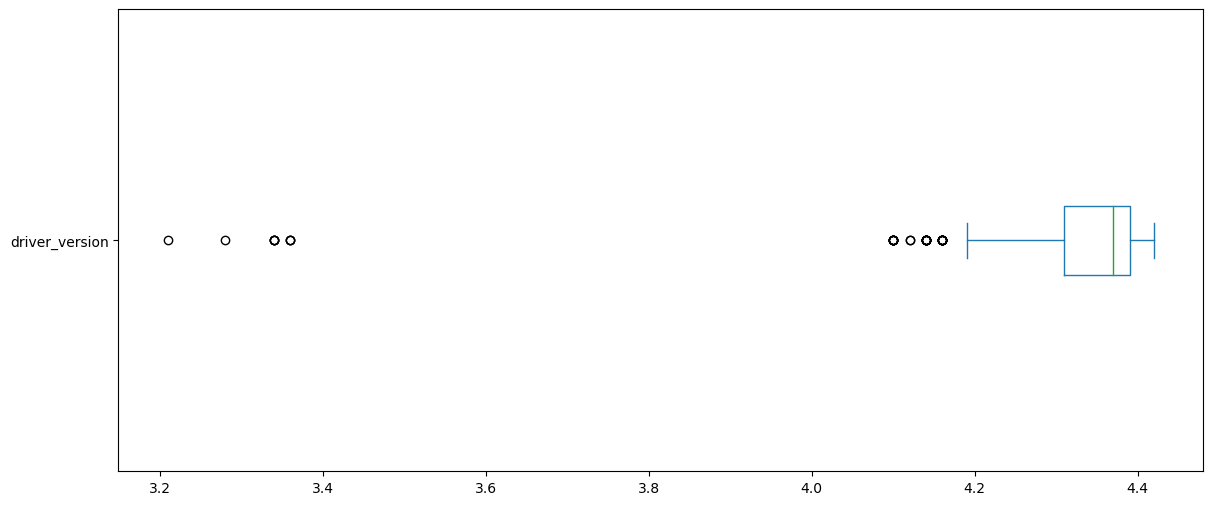

In [73]:
rides.loc[rides['overpaid_ride_ticket']==1, 'driver_version'].plot(kind='box', vert=False, figsize=(14,6))

In [74]:
rides.loc[rides['overpaid_ride_ticket']==1, 'driver_version'].describe()

count    337.000000
mean       4.321068
std        0.184678
min        3.210000
25%        4.310000
50%        4.370000
75%        4.390000
max        4.420000
Name: driver_version, dtype: float64

In [75]:
rides.loc[rides['overpaid_ride_ticket']==1, 'rider_version'].describe()

count    337.000000
mean       4.909970
std        0.580006
min        3.840000
25%        4.180000
50%        5.270000
75%        5.430000
max        5.470000
Name: rider_version, dtype: float64

<AxesSubplot:>

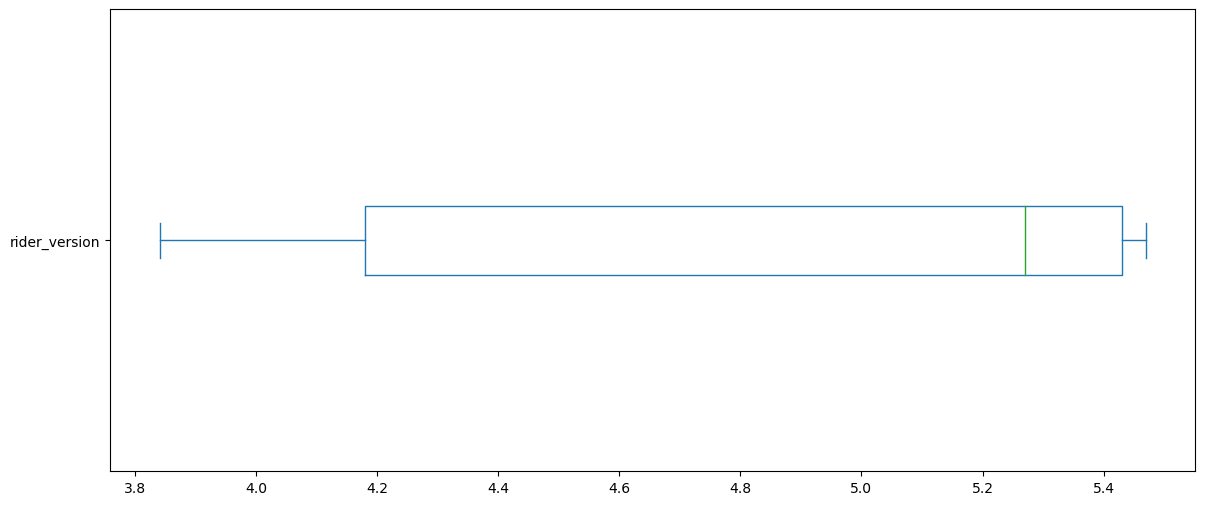

In [76]:
rides.loc[rides['overpaid_ride_ticket']==1, 'rider_version'].plot(kind='box', vert=False, figsize=(14,6))

In [77]:
rides['device_brand'] = rides['device_name'].str.split('(\s|\d|-)',expand=True, regex=True)[0]
rides['device_brand'].head()

0     Xiaomi
1    Samsung
2    Samsung
3      TECNO
4       Itel
Name: device_brand, dtype: object

In [78]:
rides['device_brand'].value_counts()

Samsung                1683
TECNO                   928
HUAWEI                  724
iPhone                  426
Xiaomi                  261
HMD                     201
INFINIX                 189
Itel                     98
Infinix                  77
Sony                     46
LGE                      39
LENOVO                   23
Foxconn                  23
OPPO                     22
BullittGroupLimited      22
ITEL                     21
HTC                      13
Alps                     12
Blackview                11
ZTE                      10
Asus                      9
LAVA                      9
SHARP                     7
DIGMA                     7
FUJITSU                   7
TCL                       7
BLU                       5
TECNO_W                   4
Motorola                  4
TP                        4
Google                    4
KONKA                     4
HTC_D                     3
Wheatek                   3
CUBOT_P                   3
OnePlus             

In [79]:
rides.loc[rides['overpaid_ride_ticket']==1, 'device_brand'].value_counts()

TECNO       156
Samsung      65
HMD          22
Infinix      17
INFINIX      16
HUAWEI       14
iPhone        9
Itel          9
ITEL          7
Foxconn       4
HTC           4
OPPO          3
Xiaomi        3
LAVA          2
BLU           2
Motorola      1
Sony          1
HTC_D         1
Lava          1
Name: device_brand, dtype: int64

# Corelação pós alteração de dados

In [80]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4943 entries, 0 to 4942
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   order_id_new           4943 non-null   int64         
 1   order_try_id_new       4943 non-null   int64         
 2   calc_created           4943 non-null   datetime64[ns]
 3   metered_price          4923 non-null   float64       
 4   upfront_price          3409 non-null   float64       
 5   distance               4943 non-null   int64         
 6   duration               4943 non-null   int64         
 7   gps_confidence         4943 non-null   int64         
 8   entered_by             4943 non-null   object        
 9   b_state                4943 non-null   object        
 10  dest_change_number     4943 non-null   int64         
 11  prediction_price_type  4923 non-null   object        
 12  predicted_distance     4923 non-null   float64       
 13  pre

In [81]:
aux = rides[['calc_created', 'metered_price','upfront_price','distance', 'duration', 'gps_confidence','entered_by', 'dest_change_number',  'prediction_price_type', 'predicted_distance', 'predicted_duration', 'change_reason_pricing', 'eu_indicator', 'overpaid_ride_ticket', 'fraud_score', 'rider_app', 'rider_version', 'driver_app', 'driver_version', 'device_brand']]
aux.head()

calc_created  metered_price  upfront_price  distance  duration  \
0 2020-02-02 03:37:31           4.04           10.0      2839       700   
1 2020-02-08 02:26:19           6.09            3.6      5698       493   
2 2020-02-08 11:50:35           4.32            3.5      4426       695   
3 2020-02-05 06:34:54       72871.72            NaN     49748      1400   
4 2020-02-13 17:31:24       20032.50        19500.0     10273      5067   

   gps_confidence entered_by  dest_change_number        prediction_price_type  \
0               1     client                   1                      upfront   
1               1     client                   1                      upfront   
2               1     client                   1                      upfront   
3               0     client                   2  upfront_destination_changed   
4               1     client                   1                      upfront   

   predicted_distance  predicted_duration       change_reason_pricing  \
0             13384.0              1091.0                         NaN   
1              2286.0               360.0                         NaN   
2              4101.0               433.0                         NaN   
3              3017.0               600.0  client_destination_changed   
4             14236.0              2778.0                         NaN   

   eu_indicator  overpaid_ride_ticket  fraud_score rider_app  rider_version  \
0             1                     0       1383.0        CI           4.17   
1             1                     0          NaN        CA           5.43   
2             1                     0        166.0        CA           5.43   
3             0                     1          NaN        CA           5.23   
4             0                     0          NaN        CA           5.04   

  driver_app  driver_version device_brand  
0         DA            4.37       Xiaomi  
1         DA            4.39      Samsung  
2         DA            4.37      Samsung  
3         DA            4.37        TECNO  
4         DA            4.37         Itel

In [82]:
corr = aux.corr()

corr

metered_price  upfront_price  distance  duration  \
metered_price              1.000000       0.420772  0.539338  0.536198   
upfront_price              0.420772       1.000000  0.167040  0.238937   
distance                   0.539338       0.167040  1.000000  0.522302   
duration                   0.536198       0.238937  0.522302  1.000000   
gps_confidence            -0.403957      -0.206987 -0.211084 -0.329022   
dest_change_number        -0.036261       0.051178  0.175893  0.156394   
predicted_distance         0.259371       0.715542  0.598392  0.357255   
predicted_duration         0.448668       0.746837  0.544905  0.523966   
eu_indicator              -0.568434      -0.413250 -0.087481 -0.351428   
overpaid_ride_ticket       0.235677       0.123028  0.116946  0.099769   
fraud_score                0.014607       0.075396 -0.069896 -0.038842   
rider_version              0.115015       0.057183  0.043656  0.065537   
driver_version             0.046317       0.033609 -0.056049  0.033473   

                      gps_confidence  dest_change_number  predicted_distance  \
metered_price              -0.403957           -0.036261            0.259371   
upfront_price              -0.206987            0.051178            0.715542   
distance                   -0.211084            0.175893            0.598392   
duration                   -0.329022            0.156394            0.357255   
gps_confidence              1.000000           -0.048085           -0.103470   
dest_change_number         -0.048085            1.000000            0.085040   
predicted_distance         -0.103470            0.085040            1.000000   
predicted_duration         -0.246450            0.044324            0.863098   
eu_indicator                0.433647            0.104739           -0.093982   
overpaid_ride_ticket       -0.268944           -0.037315            0.024945   
fraud_score                 0.026726           -0.027874           -0.064294   
rider_version              -0.068010           -0.030420            0.040103   
driver_version             -0.069163           -0.011400           -0.017906   

                      predicted_duration  eu_indicator  overpaid_ride_ticket  \
metered_price                   0.448668     -0.568434              0.235677   
upfront_price                   0.746837     -0.413250              0.123028   
distance                        0.544905     -0.087481              0.116946   
duration                        0.523966     -0.351428              0.099769   
gps_confidence                 -0.246450      0.433647             -0.268944   
dest_change_number              0.044324      0.104739             -0.037315   
predicted_distance              0.863098     -0.093982              0.024945   
predicted_duration              1.000000     -0.348380              0.105477   
eu_indicator                   -0.348380      1.000000             -0.284373   
overpaid_ride_ticket            0.105477     -0.284373              1.000000   
fraud_score                    -0.059003     -0.007761              0.028425   
rider_version                   0.073877     -0.176764              0.030315   
driver_version                  0.029778     -0.146617              0.034855   

                      fraud_score  rider_version  driver_version  
metered_price            0.014607       0.115015        0.046317  
upfront_price            0.075396       0.057183        0.033609  
distance                -0.069896       0.043656       -0.056049  
duration                -0.038842       0.065537        0.033473  
gps_confidence           0.026726      -0.068010       -0.069163  
dest_change_number      -0.027874      -0.030420       -0.011400  
predicted_distance      -0.064294       0.040103       -0.017906  
predicted_duration      -0.059003       0.073877        0.029778  
eu_indicator            -0.007761      -0.176764       -0.146617  
overpaid_ride_ticket     0.028425       0.030315        0.034855  
fraud_

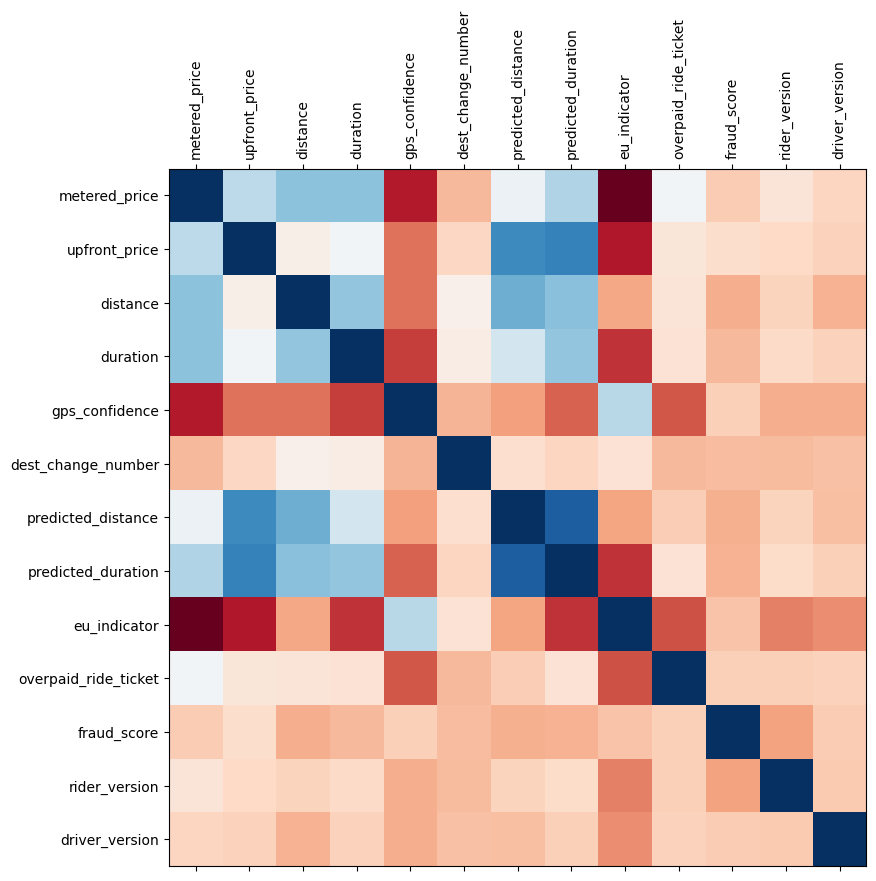

In [83]:
fig = plt.figure(figsize=(9,9))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);